# Import

In [1]:
import pandas as pd
import numpy as np

# Data Loading

In [2]:
path_data = ['../../0raw_data/PRICE_AND_DEMAND_201007_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201008_NSW1.csv',
              '../../0raw_data/PRICE_AND_DEMAND_201009_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201010_NSW1.csv',
              '../../0raw_data/PRICE_AND_DEMAND_201011_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201012_NSW1.csv',
              '../../0raw_data/PRICE_AND_DEMAND_201101_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201102_NSW1.csv',
              '../../0raw_data/PRICE_AND_DEMAND_201103_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201104_NSW1.csv',
              '../../0raw_data/PRICE_AND_DEMAND_201105_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201106_NSW1.csv',
              '../../0raw_data/PRICE_AND_DEMAND_201107_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201108_NSW1.csv',
              '../../0raw_data/PRICE_AND_DEMAND_201109_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201110_NSW1.csv',
              '../../0raw_data/PRICE_AND_DEMAND_201111_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201112_NSW1.csv',
              '../../0raw_data/PRICE_AND_DEMAND_201201_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201202_NSW1.csv',
              '../../0raw_data/PRICE_AND_DEMAND_201203_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201204_NSW1.csv',
              '../../0raw_data/PRICE_AND_DEMAND_201205_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201206_NSW1.csv',
              '../../0raw_data/PRICE_AND_DEMAND_201207_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201208_NSW1.csv',
              '../../0raw_data/PRICE_AND_DEMAND_201209_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201210_NSW1.csv',
              '../../0raw_data/PRICE_AND_DEMAND_201211_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201212_NSW1.csv',
              '../../0raw_data/PRICE_AND_DEMAND_201301_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201302_NSW1.csv',
              '../../0raw_data/PRICE_AND_DEMAND_201303_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201304_NSW1.csv',
              '../../0raw_data/PRICE_AND_DEMAND_201305_NSW1.csv', '../../0raw_data/PRICE_AND_DEMAND_201306_NSW1.csv']

In [3]:
# Load data
proccessed_df = pd.DataFrame()
for data in path_data:
    df = pd.read_csv(data, header=0, parse_dates=['SETTLEMENTDATE'], date_format="%y/%d/%m")
    proccessed_df = pd.concat([proccessed_df, df])

# Remove unneccessary data
proccessed_df.set_index(pd.RangeIndex(0, 52608), inplace=True)
proccessed_df.drop(columns=['REGION', 'SETTLEMENTDATE', 'TOTALDEMAND', 'PERIODTYPE'], inplace=True)
proccessed_df.rename(columns={"RRP": "Price"}, inplace=True)

In [4]:
# Interpolate negative values
proccessed_df.loc[proccessed_df["Price"]<0] = np.nan
proccessed_df["Price"].interpolate(method="linear", inplace=True)

In [5]:
# Add net costs
proccessed_df["Price"] = proccessed_df["Price"].div(1000)
proccessed_df["Price"] = proccessed_df["Price"] + 0.1891

# Save df
proccessed_df.to_csv("../processed_price.csv", sep=',', index=False, encoding='utf-8')

# Data Analysis

<Axes: >

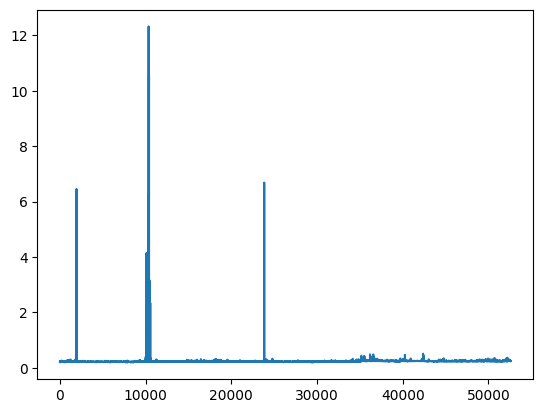

In [6]:
proccessed_df["Price"].plot()

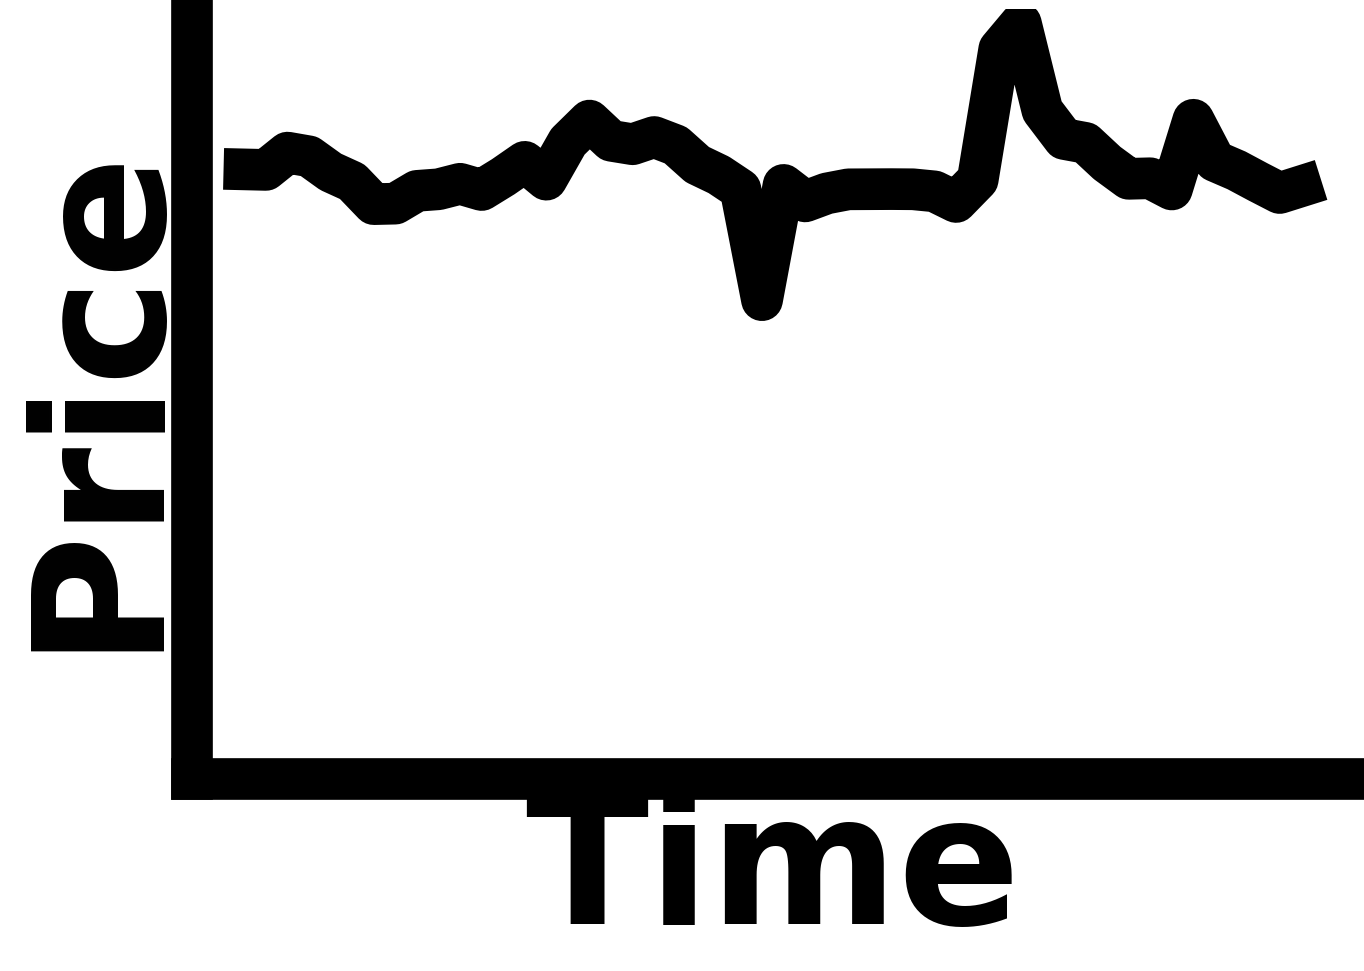

In [10]:
import matplotlib.pyplot as plt

# Plot the filtered result
plt.figure(figsize=(15, 10))
plt.plot(proccessed_df["Price"].index[:50], proccessed_df["Price"][:50], color='black', linewidth=30)  # Set line color to black and double the thickness
plt.ylim(bottom=0.1)
# Set colors for axes, labels, and title
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Hide the top spine
ax.spines['right'].set_visible(False)  # Hide the right spine
ax.spines['bottom'].set_color('black')  # Color the bottom spine
ax.spines['left'].set_color('black')  # Color the left spine

ax.spines['bottom'].set_linewidth(30)  # Make the x-axis line thicker
ax.spines['left'].set_linewidth(30)    # Make the y-axis line thicker

# Remove tick marks and labels
ax.set_xticks([])  # Remove x-axis tick marks
ax.set_yticks([])  # Remove y-axis tick marks

plt.xlabel('Time', color='black', fontweight='bold', fontsize=130)
plt.ylabel('Price', color='black', fontweight='bold', fontsize=130)
plt.savefig('filtered_price_plot.pdf', format='pdf',  dpi=300)
plt.show()

In [8]:
proccessed_df.describe()

,Price
count,52608.000000
mean,0.040497
std,0.149455
min,-0.147030
25%,0.025310
50%,0.030370
75%,0.050600
max,12.136170


## Negative Values

<Axes: >

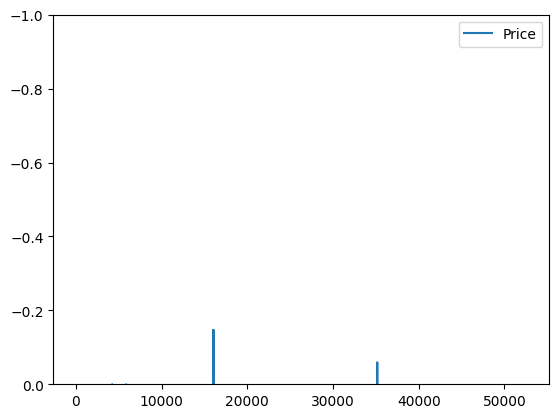

In [9]:
proccessed_df.plot(ylim=(0,-1))

In [10]:
proccessed_df.loc[proccessed_df["Price"]<0]

,SETTLEMENTDATE,Price
4230,2010/09/27 03:30:00,-0.00005
4231,2010/09/27 04:00:00,-0.00005
16010,2011/05/30 13:30:00,-0.14703
16053,2011/05/31 11:00:00,-0.14701
35160,2012/07/02 12:30:00,-0.05928


### 4230 & 4231 => interpolieren

<Axes: >

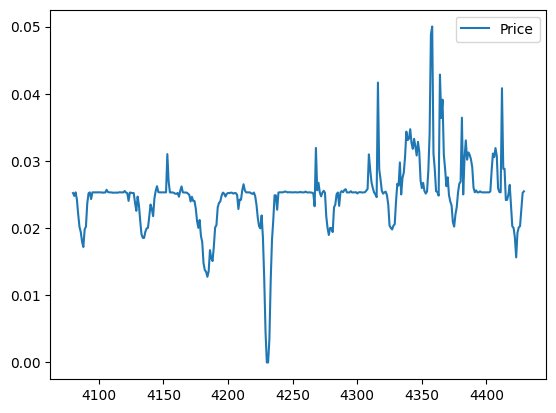

In [11]:
proccessed_df.iloc[4080:4430].plot()

=> probably missing value and floating point error combination

### 16010 & 16053 => interpolieren

<Axes: >

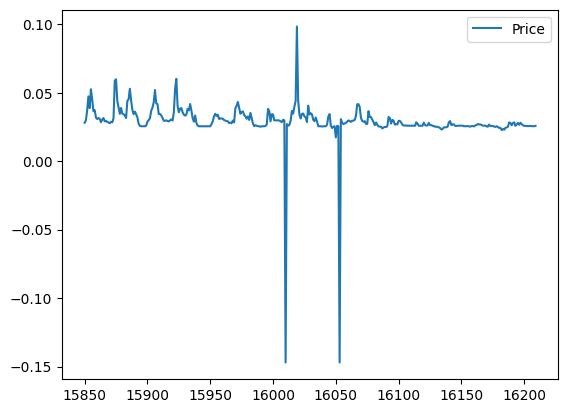

In [12]:
proccessed_df.iloc[15850:16210].plot()

<Axes: >

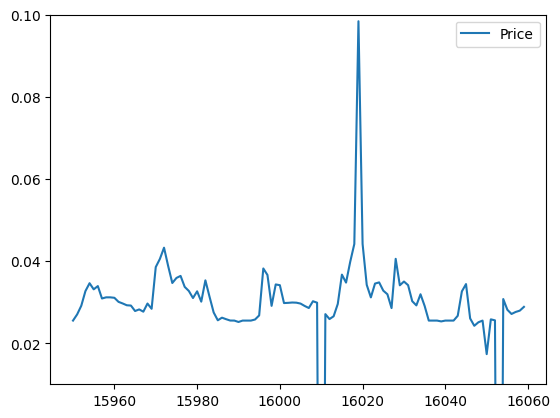

In [13]:
proccessed_df.iloc[15950:16060].plot(ylim=(0.01,0.1))

=> maybe decimal error

### 35160 => interpolieren

<Axes: >

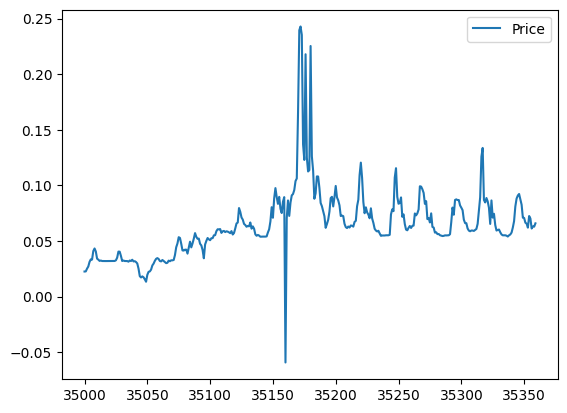

In [14]:
proccessed_df.iloc[35000:35360].plot()

<Axes: >

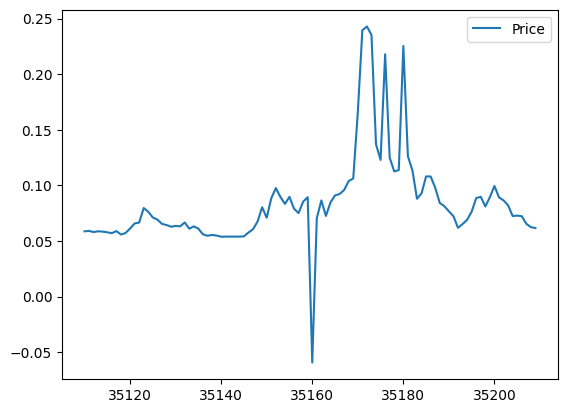

In [15]:
proccessed_df.iloc[35110:35210].plot()

=> sign error

## Extrem Small Values (Close to 0)

In [30]:
proccessed_df.loc[(proccessed_df["Price"]>=0) & (proccessed_df["Price"]<0.01)]

,SETTLEMENTDATE,Price
24,2010/07/01 12:30:00,0.00396
631,2010/07/14 04:00:00,0.00822
632,2010/07/14 04:30:00,0.00903
2169,2010/08/15 05:00:00,0.00994
3991,2010/09/22 04:00:00,0.00924
4229,2010/09/27 03:00:00,0.00452
4232,2010/09/27 04:30:00,0.00346
5860,2010/10/31 02:30:00,0.00798
5861,2010/10/31 03:00:00,0.00296
5862,2010/10/31 03:30:00,0.00334


=> ignore because their influence is only minimal after adding net cost

## Big Values (20 to 50 Cent)

<Axes: >

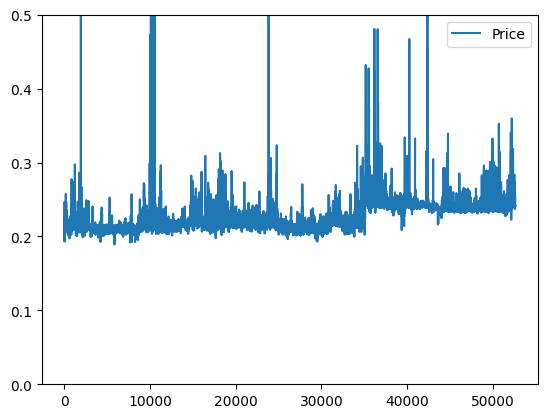

In [6]:
proccessed_df.plot(ylim=(0,0.5))

In [5]:
proccessed_df.loc[(proccessed_df["Price"]>=0.2) & (proccessed_df["Price"]<=0.35)]

,SETTLEMENTDATE,Price
10015,2011/01/25 16:00:00,0.20591
10064,2011/01/26 16:30:00,0.28409
10065,2011/01/26 17:00:00,0.24172
10070,2011/01/26 19:30:00,0.22076
10071,2011/01/26 20:00:00,0.28409
...,...,...
42410,2012/11/30 13:30:00,0.22738
42411,2012/11/30 14:00:00,0.21036
42412,2012/11/30 14:30:00,0.25778
42413,2012/11/30 15:00:00,0.26385


## Extrem Big Values (>50 Cent)

<Axes: >

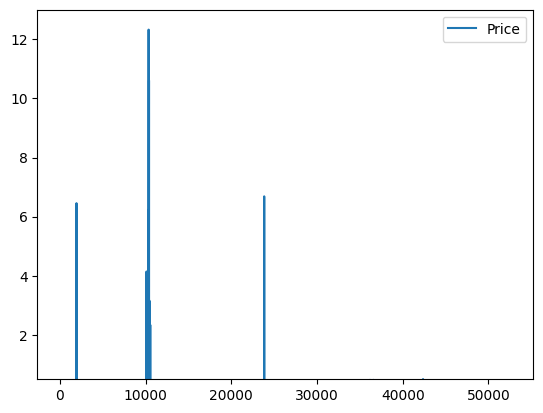

In [7]:
proccessed_df.plot(ylim=(0.5,13))

In [9]:
proccessed_df.loc[proccessed_df["Price"]>0.5]

,Price
1936,6.45560
1937,5.92788
10105,2.79885
10106,4.14473
10302,2.39032
10303,6.20907
10304,4.61115
10344,0.50456
10345,1.65588
10346,5.22899


### 1936 & 1937

<Axes: >

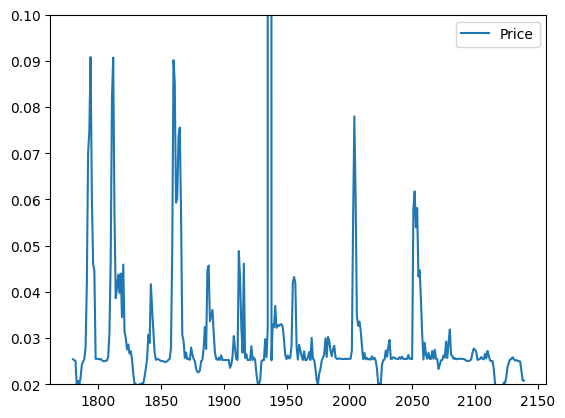

In [45]:
proccessed_df.iloc[1780:2140].plot(ylim=(0.02,0.1))

=> decimal error

### 10105 to 10543

<Axes: >

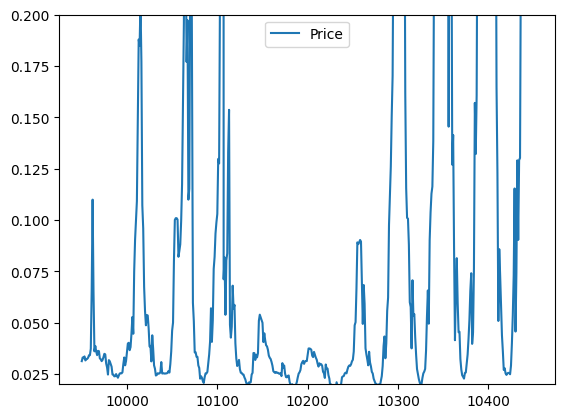

In [48]:
proccessed_df.iloc[9950:10450].plot(ylim=(0.02,0.2))

=> 26.01 Discovery of Cyclone Yasi

=> 02.02 First Hit

=> 03.02 End of Cyclone but heavy rainfall

### 23838

<Axes: >

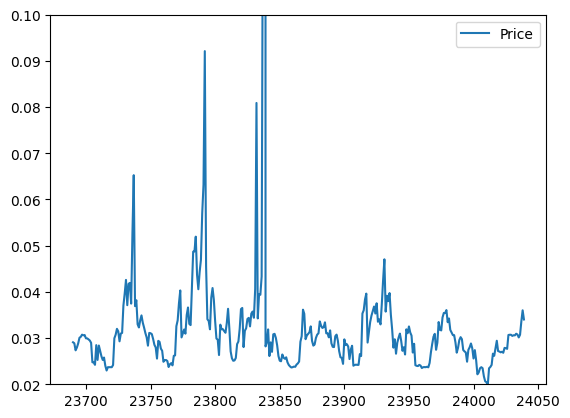

In [50]:
proccessed_df.iloc[23690:24040].plot(ylim=(0.02,0.1))

=> decimal error